In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading data
data = pd.read_csv('global_heat_index.csv')
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [4]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


## <b/> Cleaning Data

In [5]:
clean1 = data[data['Hour'] < 6]
clean2 = data[data['Hour'] > 18]

data = data.drop(clean1.index, axis=0)
data = data.drop(clean2.index, axis=0)

In [6]:
data.shape

(9490, 11)

In [7]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000
mean,2011.500000,6.526027,15.720548,12.000000,11.172603,29.843403,979.837013,41.346867,192.621930,2.404642,433.934668
std,0.500026,3.448033,8.796710,3.741855,11.204963,8.272602,6.183468,25.653292,98.401266,1.241931,307.352650
min,2011.000000,1.000000,1.000000,6.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,9.000000,2.000000,24.991642,974.409988,18.638580,98.280884,1.488960,148.000000
50%,2011.500000,7.000000,16.000000,12.000000,11.000000,30.117739,980.606934,39.359365,230.102280,2.246798,446.000000
75%,2012.000000,10.000000,23.000000,15.000000,22.000000,34.920360,985.049332,61.814032,258.325935,3.153406,693.000000
max,2012.000000,12.000000,31.000000,18.000000,27.000000,52.157927,993.353210,100.000000,359.821167,7.287084,1001.000000


## <b/> Preparing Training and Testing data

In [8]:
x = data.iloc[:, 4:10].values
y = data.iloc[:, 10].values

y = y.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [9]:
print(X_train)
print(X_test)

[[ 23.          28.95276574 974.4337769   72.00650744 230.5746765
    3.48527336]
 [  7.          31.45725588 982.7936401   21.82772614  43.92575455
    1.79098237]
 [  5.          45.90862693 977.0198364    9.19367135 256.100769
    2.31313491]
 ...
 [  1.          17.1015701  988.6531982   34.68437781   9.09429932
    1.42941236]
 [ 24.          25.72412262 975.875       95.01792758 211.7336121
    2.95700026]
 [ 25.          28.49819406 974.4430542   83.5370614  239.0466156
    2.56590128]]
[[2.00000000e+00 2.35242708e+01 9.82448975e+02 2.51051440e+01
  2.34001068e+02 2.57388616e+00]
 [2.20000000e+01 3.55614101e+01 9.76406555e+02 4.67819444e+01
  2.46593445e+02 3.80742121e+00]
 [0.00000000e+00 3.91589754e+01 9.83615540e+02 8.91904596e+00
  2.66305572e+02 3.08613610e+00]
 ...
 [2.10000000e+01 2.65977864e+01 9.81732605e+02 7.16742834e+01
  1.22379837e+01 4.89652246e-01]
 [7.00000000e+00 4.28999138e+01 9.76425354e+02 1.24208738e+01
  2.44852219e+02 3.90969253e+00]
 [2.60000000e+01 2.79

## <b/> Standardizing Data

In [10]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [11]:
print(X_train)
print(y_train)

[[ 1.05968611 -0.10596836 -0.86953246  1.20221031  0.39135863  0.85990992]
 [-0.37392147  0.19583916  0.47710333 -0.76144896 -1.50792046 -0.50344039]
 [-0.55312242  1.93732438 -0.45296102 -1.2558607   0.65110389 -0.08327831]
 ...
 [-0.91152432 -1.53411535  1.4209813  -0.25832627 -1.86235409 -0.79438603]
 [ 1.14928659 -0.49504108 -0.63737524  2.10272218  0.19963805  0.43482279]
 [ 1.23888706 -0.16074724 -0.86803804  1.65343846  0.47756634  0.12011598]]
[[-0.83425739]
 [ 0.55048309]
 [ 1.29510768]
 ...
 [-0.66116483]
 [-0.88651175]
 [-0.16148254]]


## <b/><font color='green'>K Means with 6 Clusters</font>

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans = kmeans.fit(X_train)

/Users/Ankush/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# view predict class
labels = kmeans.labels_
print('Labels : ', labels)

# view cluster centers
centers = kmeans.cluster_centers_
print('Cluster centroids : ', centers)

Labels :  [2 0 1 ... 3 2 2]
Cluster centroids :  [[-0.61067852 -0.22953897  0.85296425 -0.56900073 -1.34754782 -0.69944564]
 [-1.06683181  0.69953201  0.04271687 -1.16744214  0.83124334  0.01402357]
 [ 1.18732212  0.07003915 -0.93122377  1.27431066  0.25433125 -0.09787964]
 [-0.65151081 -1.64656972  1.18139577  0.26109687 -1.09473473 -0.02650561]
 [ 0.14674628 -0.38089807  0.65185994  0.19276176  0.69268634 -0.79074361]
 [ 0.40401817  1.04788338 -1.07514525 -0.40467305  0.50974261  1.49618357]]


## <b/><font color='green'>Applying PCA - Dimensionality Reduction</font>

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit_transform(X_train)

In [15]:
pca

array([[-1.59837425, -1.04649685],
       [ 1.2422458 ,  0.2751212 ],
       [-0.79398024,  2.07624203],
       ...,
       [ 2.88500539, -0.70662158],
       [-1.31961631, -2.03068811],
       [-1.55187659, -1.6325982 ]])

## <b/> Visualizations

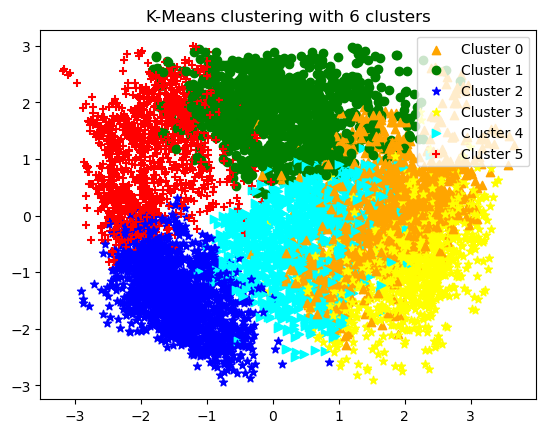

In [16]:
for i in range(0, pca.shape[0]):
    if kmeans.labels_[i] == 0:
        c1_6 = plt.scatter(pca[i,0], pca[i,1], c='orange', marker='^')
    elif kmeans.labels_[i] == 1:
        c2_6 = plt.scatter(pca[i,0], pca[i,1], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3_6 = plt.scatter(pca[i,0], pca[i,1], c='b', marker='*')
    elif kmeans.labels_[i] == 3:
        c4_6 = plt.scatter(pca[i,0], pca[i,1], c='yellow', marker='*')
    elif kmeans.labels_[i] == 4:
        c5_6 = plt.scatter(pca[i,0], pca[i,1], c='cyan', marker='>')
    elif kmeans.labels_[i] == 5:
        c6_6 = plt.scatter(pca[i,0], pca[i,1], c='red', marker='+')

plt.rcParams['figure.figsize'] = (10,6)
plt.legend([c1_6,c2_6,c3_6,c4_6,c5_6,c6_6], ['Cluster 0', 'Cluster 1', 'Cluster 2', 
                                             'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.title('K-Means clustering with 6 clusters')
plt.show()